# Python plotting tutorial

Plotting in Python can be quite simple. Below we will go through an example that take you from a model, to data, to a set of plots.

## A model of fish in a pond
Suppose there is a small pond with a species of fish that reproduces once a year. The number of fish in the pond next year is 
$$N_{t+1}= N_t e^{r\left(1-\frac{N_t}{K}\right)}$$ 
where $r$ is the groth rate of the fish at low abundance and $K$ is the carrying capacity of the fish population in this small pond.

Using this recursive equation, we can make a function that simulates the dynamics of a population with starting abundance $N_0$.

### First, though, we need to load some packages

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

We have our two most needed packages imported. 

Numpy is usefuly for all things mathematical. 

Pyplot from matplotlib is the plotting package that we will use today. 

### Now, let's build our model!

In [20]:
def FishPond(n_0,t_End,r,K):
    nData = np.zeros(t_End+1)
    tData = np.arange(t_End+1)
    nData[0] = n_0
    for i in range(t_End):
        nData[i+1] = nData[i]*np.exp(r*(1-nData[i]/K))
    return (tData, nData)

The function we created, FishPond, takes a starting population, a growth rate and a carrying capacity and recursively simulates the abundance of fish in our pond over the next t_End years.

Let's run a simulation and save the abundance timeseries.

In [21]:
output = FishPond(17,20,1,100)

Lets take a peek at the raw data...

In [22]:
output


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([ 17.        ,  38.98641858,  71.76157446,  95.1765334 ,
         99.87986158,  99.99992778, 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        ,
        100.        , 100.        , 100.        , 100.        , 100.        ]))

## Plotting 

Now, lets make a quick plot of our time series data...

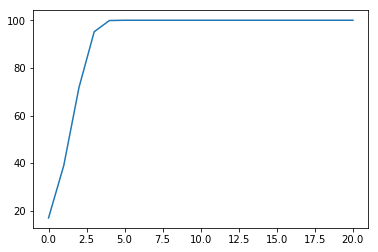

In [23]:
t = output[0]
N = output[1]
plt.plot(t,N)

It's a start, but we probably want to change some things.

Let's do another example, and make a better plot by adjusting some charateristics to our liking.

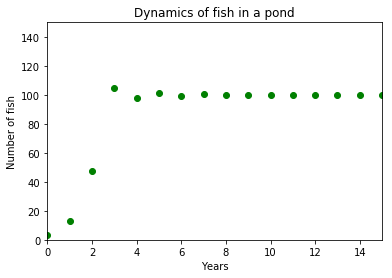

In [24]:
r = 1.5
K = 100
n_0 = 3
t_End = 15
(t,N) = FishPond(n_0,t_End,r,K)
plt.plot(t,N,'g.',markersize=12)
plt.xlim(0,t_End)
plt.ylim(0,1.5*K)
plt.xlabel('Years')
plt.ylabel('Number of fish')
plt.title('Dynamics of fish in a pond')

This is looking a bit better. Let's shift gears a bit and do some more data manipulation before plotting.

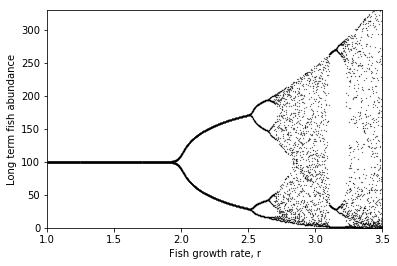

In [25]:
K = 100
n_0 = 30
t_End = 50
rMin = 1
rMAx = 3.5
rVals = np.linspace(rMin,rMAx,num=1000)
for i in range(len(rVals)):
    (t,N) = FishPond(n_0,t_End,rVals[i],K)
    nVals = N[t_End-10:t_End]
    rVal = np.full(10,rVals[i])
    plt.plot(rVal,nVals,'k.',markersize=.5)
plt.xlim(rMin,rMAx)
plt.ylim(0,330)
plt.xlabel('Fish growth rate, r')
plt.ylabel('Long term fish abundance')    

Now, let's make a larger panel figure has a second panel that zooms in on the interesting part of the above figure.

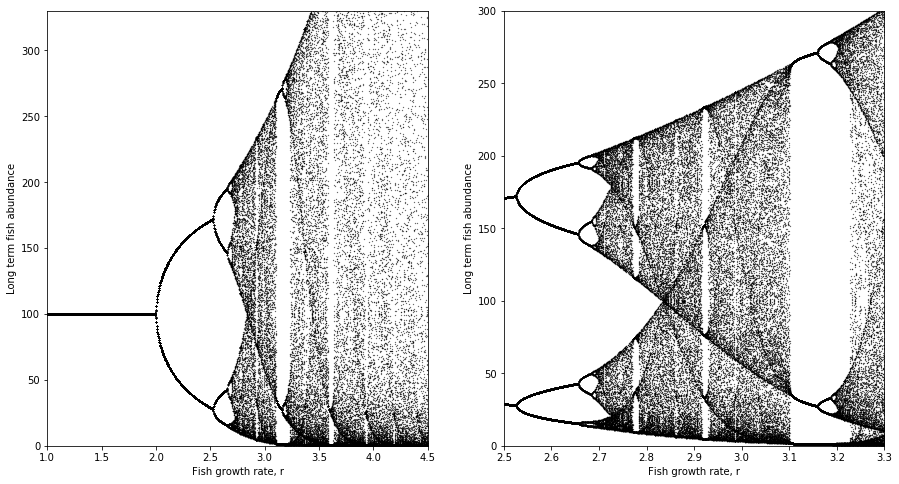

In [26]:
K = 100
n_0 = 30
t_End = 500
rMin = 1
rMAx = 4.5
rVals = np.linspace(rMin,rMAx,num=1000)
fig1 = plt.figure(figsize=(15,8))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
for i in range(len(rVals)):
    (t,N) = FishPond(n_0,t_End,rVals[i],K)
    rVal = np.full(100,rVals[i])
    nVals = N[t_End-100:t_End]
    ax1.plot(rVal,nVals,'k.',markersize=.5)
ax1.set_xlim(rMin,rMAx)
ax1.set_ylim(0,330)
ax1.set_xlabel('Fish growth rate, r')
ax1.set_ylabel('Long term fish abundance')

rMin = 2.5
rMAx = 3.3
rVals = np.linspace(rMin,rMAx,num=1000)
t_End = 1000
for i in range(len(rVals)):
    (t,N) = FishPond(n_0,t_End,rVals[i],K)
    rVal = np.full(100,rVals[i])
    nVals = N[t_End-100:t_End]
    ax2.plot(rVal,nVals,'k.',markersize=.5)
ax2.set_xlim(rMin,rMAx)
ax2.set_ylim(0,300)
ax2.set_xlabel('Fish growth rate, r')
ax2.set_ylabel('Long term fish abundance')



Above we see that if the growth rate of our fish is high enough then we get chaotic dynamics. 

## We can save the figure:

In [27]:
fig1.savefig('BifurcationDiagram.png',dpi=100)

## CSV formatted data
### note: 
Saving and reading the csv files won't work if using NBViewer, Binder in Jupyter on a browser

Lets save some data, then read it back in, make some different plots.


By plotting $N_{t+1}$ against $N_t$ we can get more insight into what is going on. 

We will make a new timeseries, save the data as a csv.

In [28]:
import csv

r = 3.13
K = 100
n_0 = 7
t_End = 2000

simData = FishPond(n_0,t_End,r,K)
File = open('FishData.csv', 'w')

with File:  
   writer = csv.writer(File)
   writer.writerows(simData)

We saved the output of our simulation as "FishData.csv" Now we can import the csv file and use it to make plots.

In [29]:
with open('FishData.csv', newline='') as myData:  
    reader = csv.reader(myData)
    simData = list(reader)
    t = simData[0]
    N = simData[1]

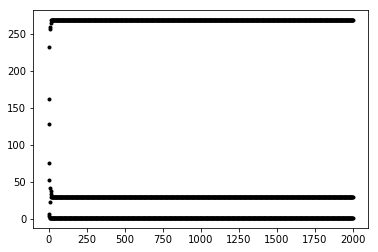

In [30]:
plt.plot(t,N,'k.') #just to confirm that what we did works 


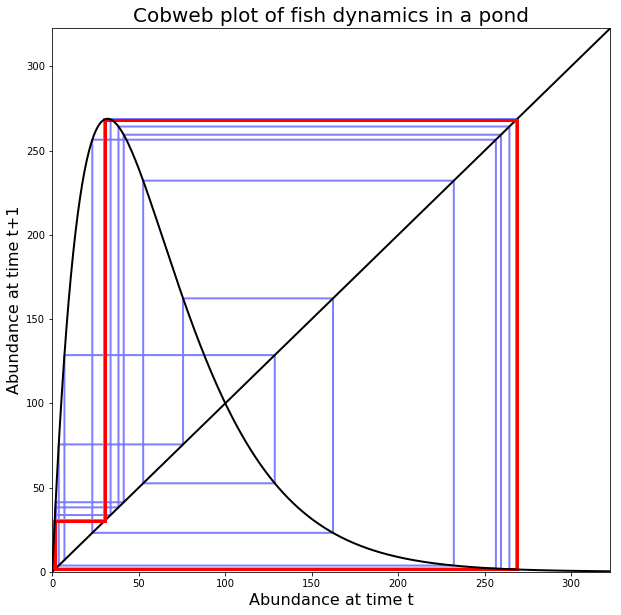

In [31]:
N = np.repeat(N,2) #this repeats each element of N two times in a row.

N0 = np.linspace(0,2000,num=3000)
N1 = N0*np.exp(r*(1-N0/K)) #these will let us plot the N_T+1 equation curve in our figure
nMax = 1.2*max(N1) #We find the max value so that we can set the bounds on our figure



fig2 = plt.figure(figsize=(10,10))
bx1 = fig2.add_subplot(1,1,1)
bx1.plot(N[0:len(N)-1],N[1:len(N)],'b-',linewidth=2,alpha=.5) #this plots full temporal dynamics transparently
bx1.plot((0,nMax),(0,nMax),'k-',linewidth=2)
bx1.plot(N[len(N)-100:len(N)-1],N[len(N)-99:len(N)],'r-',linewidth=3) #this plots the long run dynamics
bx1.plot(N0,N1,'k-',linewidth=2)

bx1.set_xlim(0,nMax)
bx1.set_ylim(0,nMax)
bx1.set_xlabel('Abundance at time t',fontsize=16)
bx1.set_ylabel('Abundance at time t+1',fontsize=16)
bx1.set_title('Cobweb plot of fish dynamics in a pond',fontsize=20)



In [33]:
fig2.savefig('Cobweb.png',dpi=100)

## The previous example without saving and reading csv formatted data


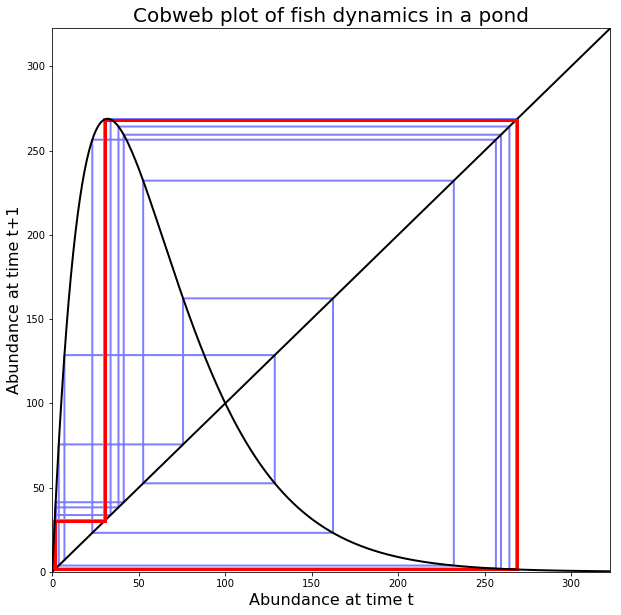

In [35]:
r = 3.13
K = 100
n_0 = 7
t_End = 2000

simData = FishPond(n_0,t_End,r,K)
t = simData[0]
N = simData[1]

N = np.repeat(N,2) #this repeats each element of N two times in a row.

N0 = np.linspace(0,2000,num=3000)
N1 = N0*np.exp(r*(1-N0/K)) #these will let us plot the N_T+1 equation curve in our figure
nMax = 1.2*max(N1) #We find the max value so that we can set the bounds on our figure



fig2 = plt.figure(figsize=(10,10))
bx1 = fig2.add_subplot(1,1,1)
bx1.plot(N[0:len(N)-1],N[1:len(N)],'b-',linewidth=2,alpha=.5) #this plots full temporal dynamics transparently
bx1.plot((0,nMax),(0,nMax),'k-',linewidth=2)
bx1.plot(N[len(N)-100:len(N)-1],N[len(N)-99:len(N)],'r-',linewidth=3) #this plots the long run dynamics
bx1.plot(N0,N1,'k-',linewidth=2)

bx1.set_xlim(0,nMax)
bx1.set_ylim(0,nMax)
bx1.set_xlabel('Abundance at time t',fontsize=16)
bx1.set_ylabel('Abundance at time t+1',fontsize=16)
bx1.set_title('Cobweb plot of fish dynamics in a pond',fontsize=20)